# **Libraries**

In [77]:
import numpy as np
import matplotlib.pyplot as plt
#For create GIF
from matplotlib.animation import FuncAnimation

# **Constants**

In [79]:
particles = 200
cubic = 200
sigma = 3.4
epsilon = 1.65
mass = 6.69
r_cutoff = 2.5 * epsilon
steps = 100
dt = 0.1

In [80]:
#Function for making lattice
def lattice(size, cubic, velocity_range, dimension):
    np.random.seed(11)
    positions = np.random.uniform(0, cubic, (size, dimension))
    velocities = np.random.uniform(-velocity_range, velocity_range, (size, dimension))
    forces = np.zeros_like(positions)
    return {"positions": positions,
            "velocities": velocities,
            "forces": forces}

In [81]:
def kinetic_energy(velocities, mass):
    return 0.5 * mass * np.sum(velocities**2)

# **Initial 2D-Lattice**

In [83]:
#Difine a lattice for simulation
platform = lattice(particles,cubic,10,2)

In [84]:
initial_positions = platform['positions']
initial_positions

array([[ 36.05393778,   3.8950483 ],
       [ 92.6437053 , 144.98678584],
       [ 84.04072092,  97.08541963],
       [  2.55616292,  97.47432146],
       [188.36133047, 170.15901788],
       [145.99289404,  21.74721437],
       [178.78083406, 171.43084941],
       [ 33.01732352, 126.46680276],
       [  4.09672256,  23.34745376],
       [ 63.27346232,  31.58246133],
       [151.79591763, 163.65507157],
       [ 68.92489819,  63.75975937],
       [ 22.3322464 ,  16.79062866],
       [142.54518714, 119.90867925],
       [ 11.13473592,  95.95945633],
       [ 80.33529613, 169.59579951],
       [143.56983587, 120.41281025],
       [110.4767643 , 189.82047955],
       [197.33466607,  67.61080993],
       [ 47.97493581, 159.2871508 ],
       [ 12.73728615,  72.9231286 ],
       [ 14.00456052,  63.87354141],
       [ 14.07651902,  58.05273343],
       [158.02022469, 181.08006416],
       [158.52427702, 112.36374203],
       [123.20367701,  72.29670844],
       [ 33.76345972,  87.24818673],
 

In [85]:
initial_velocities = platform['velocities']
initial_velocities

array([[-3.08944397e+00,  7.87654503e+00],
       [-6.23988787e-01, -1.32060143e+00],
       [-3.90159676e+00, -6.80527026e+00],
       [ 3.37746540e+00, -2.09318066e+00],
       [ 7.64211728e+00, -9.13619681e+00],
       [ 7.48698661e+00, -8.15261353e+00],
       [ 6.47036249e+00, -8.39498695e-01],
       [ 4.80349879e+00, -9.82243380e-01],
       [-6.82928423e+00,  8.96379323e+00],
       [ 2.84956020e+00, -5.70366072e+00],
       [ 1.93028504e+00, -5.80740968e+00],
       [-1.96126138e+00,  1.90449968e+00],
       [ 2.20536049e+00, -7.84124702e+00],
       [-6.14866179e+00, -8.35040823e-01],
       [ 3.23150129e-01,  7.14488554e+00],
       [ 1.53463950e+00,  6.23036871e+00],
       [-2.60585595e+00, -6.24548612e+00],
       [-4.40617006e+00, -9.50050916e+00],
       [-2.71737923e+00,  2.71000757e+00],
       [ 6.83944371e+00, -5.30413307e+00],
       [ 4.11533421e+00,  5.04879091e+00],
       [ 3.82437955e+00,  9.26757252e+00],
       [ 1.59765545e+00, -1.12887898e+00],
       [ 7.

In [86]:
initial_forces = platform['forces']
initial_forces

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.

In [87]:
def lennard_jones(radius, epsilon, sigma):
    if radius > 1e-10:
        const = sigma / radius
        lejo_potential = 4 * epsilon * ( (const)**12 - (const)**6 )
        lejo_force = ((24 * epsilon ) / sigma**2) * (2*(const)**14 - (const)**8)
        return {"lennard_jones_potential" : lejo_potential,
               "lennard_jones_force" : lejo_force}
        
    else:
        print("Warning: Zero distance encountered. Skipping particle pair.")
        return {"lennard_jones_potential" : 0,
               "lennard_jones_force" : 0}

In [88]:
# Example
lennard_jones(5,epsilon,sigma)

{'lennard_jones_potential': -0.5880118431237138,
 'lennard_jones_force': -0.12563959222296675}

In [89]:
def compute_force(lattice):
    forces = np.zeros_like(lattice)
    potential_energy = 0
    particles = lattice.shape[0]
    for i in range(particles):
        for j in range(i + 1, particles):
            r_vec = lattice[j] - lattice[i]
            r_vec -= cubic * np.round(r_vec / cubic)
            r = np.linalg.norm(r_vec)
            if (r < r_cutoff) and (r>1e-10) :
                potential = lennard_jones(r, epsilon, sigma)['lennard_jones_potential']
                f_mag = lennard_jones(r, epsilon, sigma)['lennard_jones_force']
                potential_energy += potential
                f_vec = f_mag * (r_vec / r)
                forces[i] += f_vec
                forces[j] -= f_vec 
    return forces , potential_energy

In [90]:
# Example
compute_force(initial_positions)

(array([[ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 5.21599869e+02,  1.09753480e+03],
        [ 7.32597443e+05,  6.15443184e+05],
        [ 1.86088235e+03,  1.17939336e+03],
        [ 1.15625918e+00,  1.15090919e+00],
        [ 2.64253550e+07,  1.30013733e+07],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00],
        [-2.64253550e+07, -1.30013733e+07],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 1.25824111e+02,  1.33083572e+02],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 2.49717854e+01,  3.29383278e+01],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 8.51002411e+01, -1.801

In [91]:
def verlet(lattice , dt):
    positions = lattice['positions']
    velocities = lattice['velocities']
    forces = lattice['forces']
    positions += velocities * dt + 0.5 * forces * dt**2
    positions %= cubic 
    new_forces = compute_force(positions)[0]
    potential_energy = compute_force(positions)[1]
    velocities += 0.5 * (forces + new_forces) * dt
    return positions, velocities, new_forces , potential_energy

In [92]:
# Example
verlet(lattice(particles,10,10,2),dt)

(array([[1.49375249e+00, 9.82406918e-01],
        [4.56978639e+00, 7.11727915e+00],
        [3.81187637e+00, 4.17374396e+00],
        [4.65554686e-01, 4.66439801e+00],
        [1.01822783e+01, 7.59433121e+00],
        [8.04834336e+00, 2.72099366e-01],
        [9.58607795e+00, 8.48759260e+00],
        [2.13121606e+00, 6.22511580e+00],
        [1.99521908e+02, 2.06375201e+00],
        [3.44862914e+00, 1.00875699e+00],
        [7.78282439e+00, 7.60201261e+00],
        [3.25011877e+00, 3.37843794e+00],
        [1.33714837e+00, 5.54067315e-02],
        [6.51239318e+00, 5.91192988e+00],
        [5.89051809e-01, 5.51246137e+00],
        [4.17022876e+00, 9.10282685e+00],
        [6.91790620e+00, 5.39609190e+00],
        [5.08322121e+00, 8.54097306e+00],
        [9.59499538e+00, 3.65154125e+00],
        [3.08269116e+00, 7.43394423e+00],
        [1.04839773e+00, 4.15103552e+00],
        [1.08266598e+00, 4.12043432e+00],
        [8.63591496e-01, 2.78974877e+00],
        [7.97460878e+00, 8.0635268

# **Simulation**

In [94]:
positions_list = []
before_varlet = []
after_verlet = []

for step in range(steps):
    # Before Verlet step: Calculate total energy (T + V)
    kinetic_before = kinetic_energy(initial_velocities, mass)
    forces, potential_before = compute_force(initial_positions)
    total_energy_before = kinetic_before + potential_before
    before_varlet.append(total_energy_before)
    
    # Verlet
    positions, velocities, forces, potential_after = verlet(platform, dt)
    
    # After Verlet step: Calculate total energy (T + V)
    kinetic_after = kinetic_energy(velocities, mass)
    total_energy_after = kinetic_after + potential_after
    after_verlet.append(total_energy_after)  # Store energy after Verlet
    
    if step % 10 == 0:
        positions_list.append(positions.copy())

# Sum the energies
before_total = sum(before_varlet)
after_total = sum(after_verlet)

# print('Energy for 50 particle')
# print(f"Total Energy Before Verlet: {before_total}")
# print(f"Total Energy After Verlet: {after_total}")

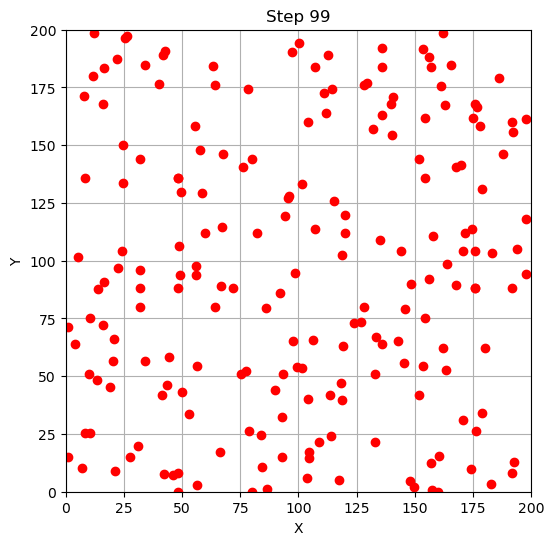

GIF saved as 'MD simulation for 200 particle.gif'


In [95]:
positions_list = []
forces = compute_force(initial_positions)
for step in range(steps):
    positions = verlet(platform, dt)[0]
    velocities = verlet(platform, dt)[1]
    forces = verlet(platform, dt)[2]
    positions_list.append(positions.copy())
        
fig, ax = plt.subplots(figsize=(6, 6))

ax.set_xlim(0, cubic)
ax.set_ylim(0, cubic)
ax.grid(True)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Particle Simulation")

particles, = ax.plot([], [], 'ro', markersize=6)

def update(frame):
    positions = positions_list[frame]
    particles.set_data(positions[:, 0], positions[:, 1])
    ax.set_title(f"Step {frame}")
    return particles,

ani = FuncAnimation(fig, update, frames=len(positions_list), interval=5000, blit=True)

ani.save("MD simulation for 200 particle(dt=0.1).gif", writer="pillow", fps=300)

plt.show()
print("GIF saved as 'MD simulation for 200 particle.gif'")